In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("alzheimer.csv")

In [3]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [7]:
df['Group'].replace(['Nondemented','Demented'],[0,1],inplace=True)
df['M/F'].replace(['M', 'F'],[0, 1], inplace=True)
df=df.drop(df[df["Group"]=="Converted"].index)

In [8]:
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
cols=list(df.columns)
x_train,x_test,y_train,y_test = train_test_split(df[cols[1:]],df[cols[0:1]], train_size=0.8, test_size=0.2, shuffle=False)

In [12]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

y_train=list(y_train["Group"])
y_test=list(y_test["Group"])

x_train.shape, len(y_train), x_test.shape, len(y_test)

((253, 9), 253, (64, 9), 64)

In [13]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [14]:
feature_imp = pd.Series(model.feature_importances_,index=cols[1:]).sort_values(ascending=False)
feature_imp

CDR     0.633739
MMSE    0.225044
nWBV    0.029753
EDUC    0.026123
eTIV    0.023430
ASF     0.022365
Age     0.016325
SES     0.011618
M/F     0.011603
dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Features')

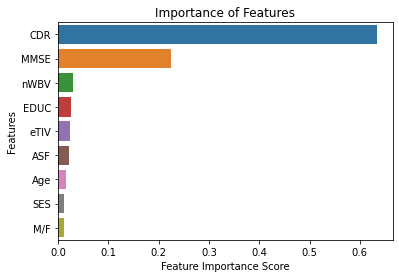

In [16]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.title('Importance of Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

<AxesSubplot:>

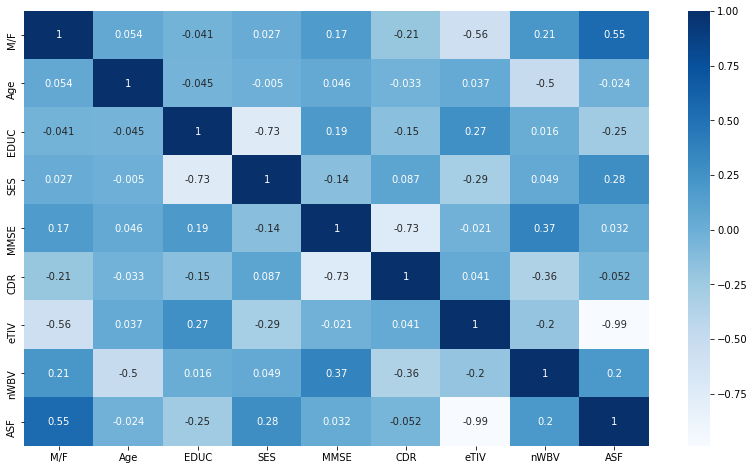

In [17]:
plt.figure(figsize=(14,8))

corr = df.corr()

sns.heatmap(corr, 
        cmap="Blues", annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [37]:
df['CDR'].max()

2.0

In [38]:
cols=list(df.columns)
x_train,x_test,y_train,y_test = train_test_split(df[["MMSE","CDR"]],df[cols[0:1]], train_size=0.8, test_size=0.2, shuffle=False)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

y_train=list(y_train["Group"])
y_test=list(y_test["Group"])

x_train.shape, len(y_train), x_test.shape, len(y_test)

((253, 2), 253, (64, 2), 64)

In [39]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred=model.predict([[20,1]])
y_pred

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        26

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [32]:
import pickle

In [34]:
pickle.dump(model,open('model_rf.pkl','wb'))
model=pickle.load(open('model_rf.pkl','rb'))